# Imports

In [1]:
import pickle
import numpy as np
import rmlib

In [2]:
rm = rmlib.RMLib()

Robot Ready


# File Name

In [3]:
file_name = "assembly_features"

# Load/Create Dictionary 

In [4]:
try:
    with open(file_name, 'rb') as f:
        feature_dictionary = pickle.load(f)
        print("File Loaded")
        print('Dictionary Features:')
        for item1 in feature_dictionary:
            print(item1+":")
            for item2 in feature_dictionary[item1]:
                print('      ',item2,' = ',feature_dictionary[item1][item2])
                
except:
    print("No File Found, Creating New Dictionary")
    feature_dictionary = {}

File Loaded
Dictionary Features:
safe:
       pose  =  [-0.2875122767581866, -0.048576704794951284, 0.28681665788637356, -2.2215003746228157, 2.2198375308394622, -0.001894878661018758]
block_1:
       pose  =  [-0.3318332014854161, 0.03669370123412208, 0.03772753979931609, -2.221577332604153, 2.219792595241588, -0.0016647539847212756]
       view_distance  =  0.06
       cloud_locator_params  =  [170, 0.0008, 0.0033, 500]


# Create Feature

In [8]:
feature_name = "gear_1"
feature_dictionary[feature_name] = {}

# Set Global Location

In [16]:
rm.close_gripper()

0

In [9]:
rm.align_gripper_with_axis()

In [10]:
#Move finger tips to part and save location
global_pose = rm.get_tcp_pose()
feature_dictionary[feature_name]["pose"] = global_pose

In [11]:
#Set view distance
view_height = 0.06
feature_dictionary[feature_name]["view_distance"] = view_height

#Move gripper to view location
rm.movel(np.add(global_pose,[0,0,view_height,0,0,0]))
rm.move_camera_over_tcp()

# Circle Location Parameters

In [ ]:
rm.open_gripper()

search parameters(circle_dia: 72 minR: 66px maxR: 76px)
no circles found in image
no circles found in image
[100, 20, 16, 33, 38, 0, 0.179]


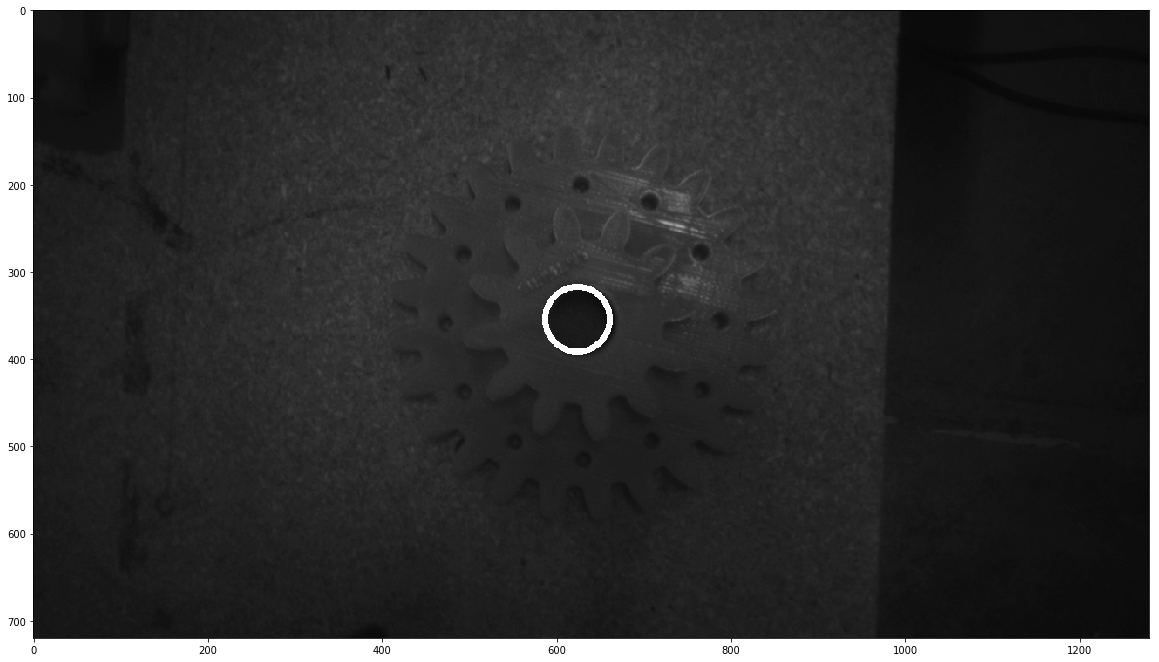

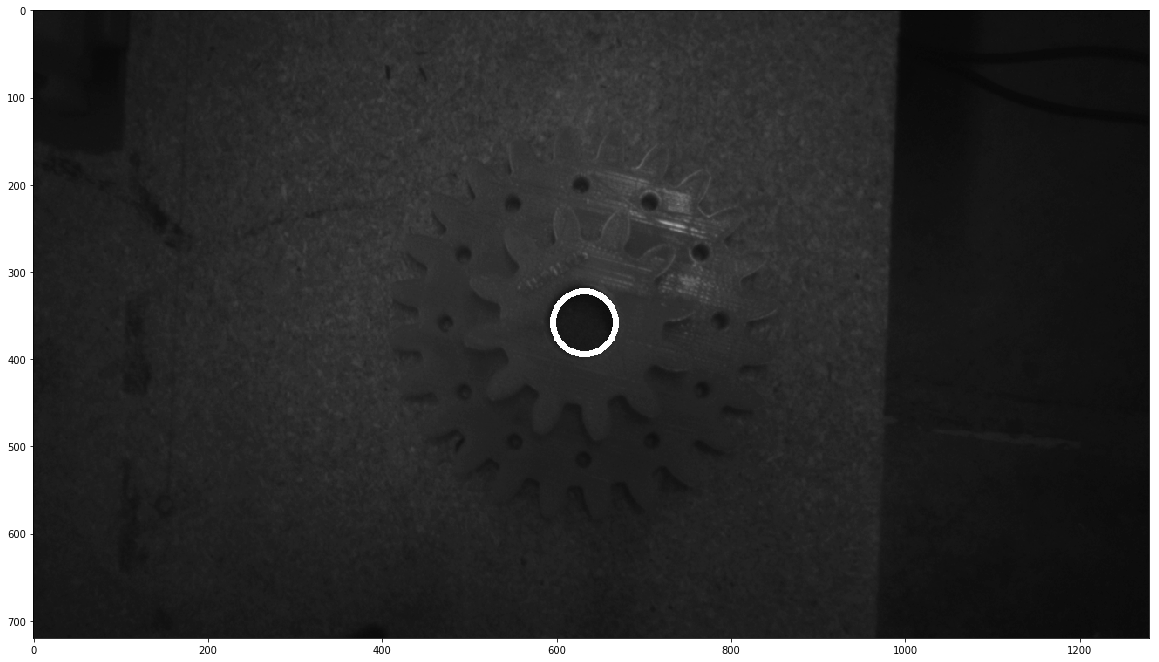

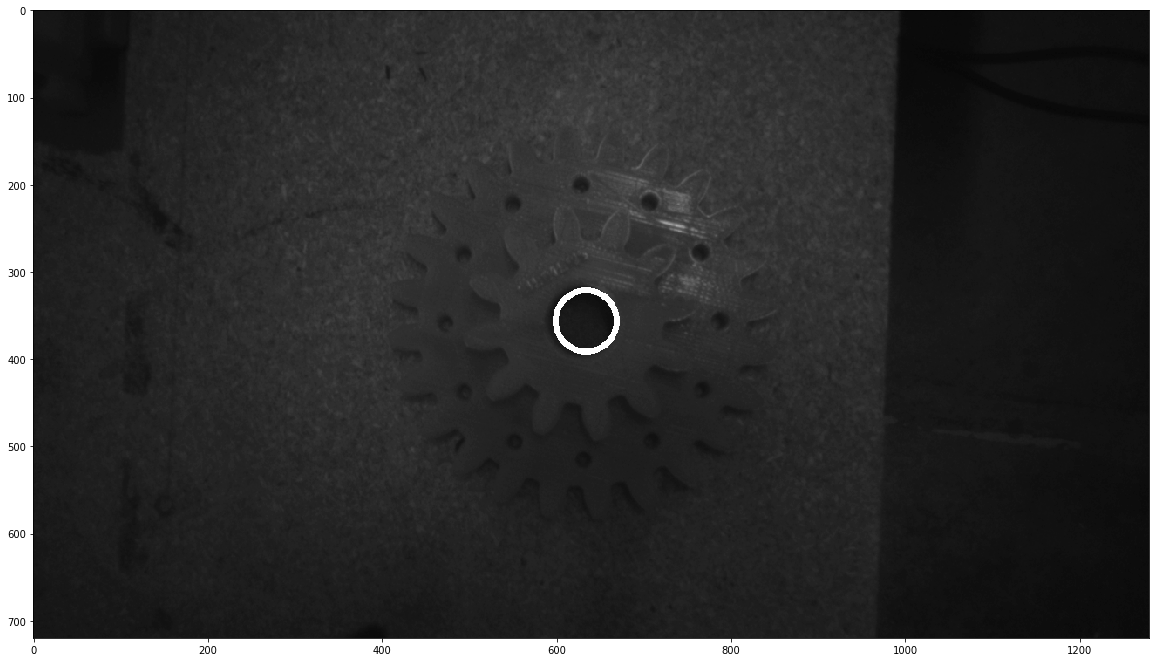

In [21]:
#Tune center circle parameters
#Tune parameters to minimize false circles and find desired circle in most images
circle_locator_params = rm.tune_circle_locator(min_hough_dist=100, param1=20, param2=16, image_blur=0, z_dist_to_cir=view_height, cir_dia=0.014, dia_tol=0.001, max_loops=5)
print(circle_locator_params)
feature_dictionary[feature_name]["circle_locator_params"] = circle_locator_params

# General Part Location Parameters

In [12]:
rm.open_gripper()

0

In [12]:
#Tune general part parameters
general_part_locator_params = rm.tune_cloud_locator(disparity_shift=170, leaf_size=0.0008, search_radius=0.0033, min_cluster_size=500)
print(general_part_locator_params)
feature_dictionary[feature_name]["cloud_locator_params"] = general_part_locator_params

/home/nvidia/.local/lib/python3.5/site-packages/pythreejs/traits.py:177: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.014934271591306763, 0.11467235352544014, …

[170, 0.0008, 0.0033, 500]


# Save Feature

In [7]:
with open(file_name, 'wb') as f:
    pickle.dump(feature_dictionary, f, pickle.DEFAULT_PROTOCOL)